In [1]:
import pandas as pd
import json

In [2]:
date = '2017-08-30'
fn = 'DB-backup/%s/cyclings_vid1.json' % date
data = json.load(open(fn))
dfs = {}
for i, item in enumerate(data):
    if item['type']=='table':
        name = item['name']
        if name not in ( 'video2seg_temp'):
            print(i,item['name'])
            dfs[name] = pd.DataFrame(item['data'])

2 loginLog
3 Rating
4 RoadSegment
5 Users
6 Video
8 VideoRoadSeg


In [13]:
users = dfs['Users']
ratings = dfs['Rating'].drop('email', axis=1)
videos=dfs['Video']
videos.URL = videos.URL.apply(lambda x: 'https://www.youtube.com/watch?v='+x)
vid2seg = dfs['VideoRoadSeg']
segs = dfs['RoadSegment']

In [52]:
joint_table = ratings.merge(vid2seg[['vid', 'index_seg', 'ratio']]\
                     .merge(segs[['index_seg', 'geometry']])\
                     .merge(videos[['vid','URL']]))
joint_table.ratio = joint_table.ratio.astype(float) 
joint_table.score = joint_table.score.astype(float)

In [54]:
nontest_users = users[~users.email.str.contains('test')]
selected_uid = nontest_users[~nontest_users.experienceLevel.isnull()].user_id
selected_uid = nontest_users.user_id
selected_name = 'all'

In [71]:
filtered_ratings = joint_table[joint_table.uid.isin(selected_uid)]

In [72]:
print('filtered uid:')
set(ratings.uid) - set(filtered_ratings.uid)

set()

In [79]:
y = filtered_ratings.groupby('index_seg').apply(lambda x: (x.score* x.ratio).sum()/x.ratio.sum()).to_frame()
y.columns = ['score']

In [83]:
y.to_csv('y_by_user_%s.csv' % selected_name)

In [ ]:
%matplotlib inline

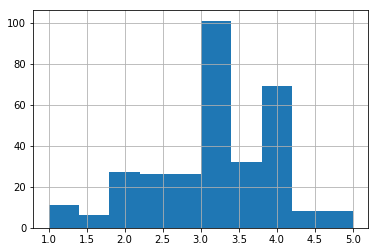

In [84]:
y.score.hist()